## Overview
The goal of this competition is to detect and classify seizures and other types of harmful brain activity. You will develop a model trained on electroencephalography (EEG) signals recorded from critically ill hospital patients.

Your work may help rapidly improve electroencephalography pattern classification accuracy, unlocking transformative benefits for neurocritical care, epilepsy, and drug development. Advancement in this area may allow doctors and brain researchers to detect seizures or other brain damage to provide faster and more accurate treatments.

## Description

From stethoscopes to tongue depressors, doctors rely on many tools to treat their patients. Physicians use electroencephalography with critically ill patients to detect seizures and other types of brain activity that can cause brain damage. You can learn about how doctors interpret these EEG signals in these videos:
EEG Talk - ACNS Critical Care EEG Terminology 2021 (Part 1) (Part 2) (Part 3) (Part 4) (Part 5)

Currently, EEG monitoring relies solely on manual analysis by specialized neurologists. While invaluable, this labor-intensive process is a major bottleneck. Not only can it be time-consuming, but manual review of EEG recordings is also expensive, prone to fatigue-related errors, and suffers from reliability issues between different reviewers, even when those reviewers are experts.

Competition host Sunstella Foundation was created in 2021 during the COVID pandemic to help minority graduate students in technology overcome challenges and celebrate their achievements. These students are vital to America's technology leadership and diversity. Through workshops, forums, and competitions, the Sunstella Foundation provides mentorship and career advice to support their success.

Sunstella Foundation is joined by Persyst, Jazz Pharmaceuticals, and the Clinical Data Animation Center (CDAC), whose research aims to help people preserve and enhance brain health.

Your work in automating EEG analysis will help doctors and brain researchers detect seizures and other types of brain activity that can cause brain damage, so that they can give treatments more quickly and accurately. The algorithms developed in this contest may also help researchers who are working to develop drugs to treat and prevent seizures.

There are six patterns of interest for this competition: seizure (SZ), generalized periodic discharges (GPD), lateralized periodic discharges (LPD), lateralized rhythmic delta activity (LRDA), generalized rhythmic delta activity (GRDA), or “other”. Detailed explanations of these patterns are available here.

The EEG segments used in this competition have been annotated, or classified, by a group of experts. In some cases experts completely agree about the correct label. On other cases the experts disagree. We call segments where there are high levels of agreement “idealized” patterns. Cases where ~1/2 of experts give a label as “other” and ~1/2 give one of the remaining five labels, we call “proto patterns”. Cases where experts are approximately split between 2 of the 5 named patterns, we call “edge cases”.

Examples of EEG Patterns with Different Levels of Expert Agreement:
![hms1](https://storage.googleapis.com/kaggle-media/competitions/Harvard%20Medical%20School/eFig2.png)

Please refer to Data tab for full screen PDF page of each subfigure.

This figure shows selected examples of EEG patterns with different level of agreement. Rows are structured with the 1st row seizure, 2nd row LPDs, 3rd row GPDs, 4th row LRDA, and 5th row GRDA. Column-wise, examples of idealized forms of patterns are in the 1st column (A). These are patterns with uniform expert agreement. The 2nd column (B) are proto or partially formed patterns. About half of raters labeled these as one IIIC pattern and the other half labeled “Other”. The 3rd and 4th columns (C, D) are edge cases (about half of raters labeled these one IIIC pattern and half labeled them as another IIIC pattern).

For B-1 there is rhythmic delta activity with some admixed sharp discharges within the 10 second raw EEG, and the spectrogram shows that this segment may belong to the tail end of a seizure, thus disagreement between SZ and “Other” makes sense. B-2 shows frontal lateralized sharp transients at ~1Hz, but they have a reversed polarity, suggesting they may be coming from a non-cerebral source, thus the split between LPD and “Other” (artifact) makes sense. B-3 has diffused semi-rhythmic delta background with poorly formed low amplitude generalized periodic discharges with s shifting morphology making it a proto-GPD type pattern. B-4 shows semi-rhythmic delta activity with unstable morphology over the right hemisphere, a proto-LRDA pattern. B-5 shows a few waves of rhythmic delta activity with an unstable morphology and is poorly sustained, a proto-GRDA. C-1 shows 2Hz LPDs showing an evolution with increasing amplitude evolving underlying rhythmic activity, a pattern between LPDs and the beginning of a seizure, an edge-case. D-1 shows abundant GPDs on top of a suppressed background with frequency of 1-2Hz. The average over the 10-seconds is close to 1.5Hz, suggesting a seizure, another edge case. C-2 is split between LPDs and GPDs. The amplitude of the periodic discharges is higher over the right, but a reflection is also seen on the left. D-2 is tied between LPDs and LRDA. It shares some features of both; in the temporal derivations it looks more rhythmic whereas in the parasagittal derivations it looks periodic. C-3 is split between GPDs and LRDA. The ascending limb of the delta waves have a sharp morphology, and these periodic discharges are seen on both sides. The rhythmic delta appears to be of higher amplitude over the left, but there is some reflection of the activity on the left. D-3 is split between GPDs and GRDA. The ascending limb of the delta wave has a sharp morphology and there is asymmetry in slope between ascending and descending limbs making it an edge case. C-4 is split between LRDA and seizure. It shows 2Hz LRDA on the left, and the spectrogram shows that this segment may belong to the tail end of a seizure, an edge-case. D-4 is split between LRDA and GRDA. The rhythmic delta appears to be of higher amplitude over the left, but there is some reflection of the activity on the right. C-5 is split between GRDA and seizure. It shows potentially evolving rhythmic delta activity with poorly formed embedded epileptiform discharges, a pattern between GRDA and seizure, an edge-case. D-5 is split between GRDA and LPDs. There is generalized rhythmic delta activity, while the activity on the right is somewhat higher amplitude and contains poorly formed epileptiform discharges suggestive of LPDs, an edge-case. Note: Recording regions of the EEG electrodes are abbreviated as LL = left lateral; RL = right lateral; LP = left parasagittal; RP = right parasagittal.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/hms/train.csv")
train

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0       1628180742           0                       0.0          353733   
1       1628180742           1                       6.0          353733   
2       1628180742           2                       8.0          353733   
3       1628180742           3                      18.0          353733   
4       1628180742           4                      24.0          353733   
...            ...         ...                       ...             ...   
106795   351917269           6                      12.0      2147388374   
106796   351917269           7                      14.0      2147388374   
106797   351917269           8                      16.0      2147388374   
106798   351917269           9                      18.0      2147388374   
106799   351917269          10                      20.0      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                        0                               0.0   127492639   
1                        1                               6.0  3887563113   
2                        2                               8.0  1142670488   
3                        3                              18.0  2718991173   
4                        4                              24.0  3080632009   
...                    ...                               ...         ...   
106795                   6                              12.0  4195677307   
106796                   7                              14.0   290896675   
106797                   8                              16.0   461435451   
106798                   9                              18.0  3786213131   
106799                  10                              20.0  3642716176   

        patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
0            42516          Seizure             3         0         0   
1            42516          Seizure             3         0         0   
2            42516          Seizure             3         0         0   
3            42516          Seizure             3         0         0   
4            42516          Seizure             3         0         0   
...            ...              ...           ...       ...       ...   
106795       10351             LRDA             0         0         0   
106796       10351             LRDA             0         0         0   
106797       10351             LRDA             0         0         0   
106798       10351             LRDA             0         0         0   
106799       10351             LRDA             0         0         0   

        lrda_vote  grda_vote  other_vote  
0               0          0           0  
1               0          0           0  
2               0          0           0  
3               0          0           0  
4               0          0           0  
...           ...        ...         ...  
106795          3          0           0  
106796          3          0           0  
106797          3          0           0  
106798          3          0           0  
106799          3          0           0  

[106800 rows x 15 columns]

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/hms/test.csv")
test

spectrogram_id      eeg_id  patient_id
0          853520  3911565283        6885

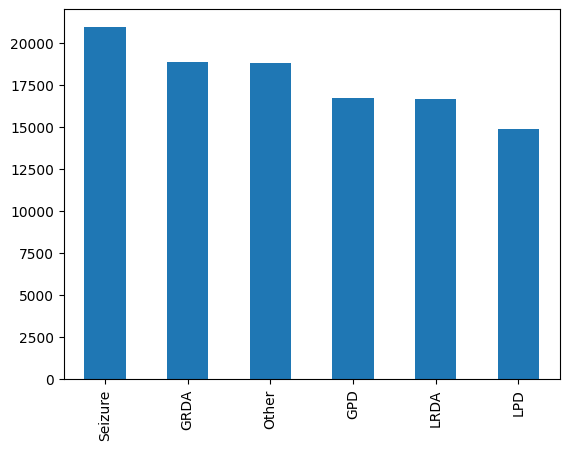

In [ ]:
train["expert_consensus"].value_counts().plot(kind='bar');

In [ ]:
sample_train_eeg = pd.read_parquet("/content/drive/MyDrive/Colab_Notebooks/hms/train_eegs/1000913311.parquet")
sample_train_eeg

Fp1          F3          C3          P3          F7          T3  \
0    -105.849998  -89.230003  -79.459999  -49.230000  -99.730003  -87.769997   
1     -85.470001  -75.070000  -60.259998  -38.919998  -73.080002  -87.510002   
2       8.840000   34.849998   56.430000   67.970001   48.099998   25.350000   
3     -56.320000  -37.279999  -28.100000   -2.820000  -43.430000  -35.049999   
4    -110.139999 -104.519997  -96.879997  -70.250000 -111.660004 -114.430000   
...          ...         ...         ...         ...         ...         ...   
9995  -45.540001  -26.459999  -23.209999  -25.250000  -21.559999  -36.549999   
9996  -26.860001    4.350000    7.410000    7.830000    5.260000    7.750000   
9997 -133.759995 -111.190002 -119.180000 -105.760002 -130.039993 -104.059998   
9998  -78.889999  -59.660000  -60.770000  -59.810001  -63.020000  -60.020000   
9999    3.780000   36.009998   41.060001   34.389999   42.340000   37.709999   

             T5         O1         Fz         Cz         Pz         Fp2  \
0    -53.330002 -50.740002 -32.250000 -42.099998 -43.270000  -88.730003   
1    -39.680000 -35.630001 -76.839996 -62.740002 -43.040001  -68.629997   
2     80.250000  48.060001   6.720000  37.880001  61.000000   16.580000   
3      3.910000 -12.660000   8.650000   3.830000   4.180000  -51.900002   
4    -71.830002 -61.919998 -76.150002 -79.779999 -67.480003  -99.029999   
...         ...        ...        ...        ...        ...         ...   
9995  10.730000 -16.290001 -55.919998 -28.670000 -29.770000  -22.000000   
9996  50.130001   4.150000   1.720000  22.100000   7.150000   -6.820000   
9997 -68.290001 -86.480003 -57.130001 -68.830002 -95.839996 -107.540001   
9998 -20.690001 -42.820000 -68.669998 -54.740002 -62.810001  -52.869999   
9999  78.510002  28.770000   9.520000  38.189999  28.389999   22.920000   

             F4          C4         P4         F8         T4          T6  \
0    -74.410004  -92.459999 -58.930000 -75.739998 -59.470001    8.210000   
1    -61.689999  -69.320000 -35.790001 -58.900002 -41.660000  196.190002   
2     55.060001   45.020000  70.529999  47.820000  72.029999  -67.180000   
3    -21.889999  -41.330002 -11.580000 -27.040001 -11.730000  -91.000000   
4    -93.610001 -104.410004 -70.070000 -89.250000 -77.260002  155.729996   
...         ...         ...        ...        ...        ...         ...   
9995   3.710000    8.470000   0.480000   9.950000  33.959999  110.510002   
9996  38.070000   32.880001  21.990000  32.990002  60.209999 -156.949997   
9997 -86.449997  -94.099998 -97.050003 -86.339996 -68.040001  -14.880000   
9998 -34.099998  -31.500000 -37.810001 -32.259998 -10.870000  137.559998   
9999  69.970001   69.220001  53.160000  61.549999  90.910004 -115.550003   

              O2          EKG  
0      66.489998  1404.930054  
1     230.669998  3402.669922  
2    -171.309998 -3565.800049  
3     -81.190002 -1280.930054  
4     264.850006  4325.370117  
...          ...          ...  
9995   58.599998   301.239990  
9996 -275.929993 -4634.799805  
9997   66.440002  1667.800049  
9998  193.839996  2743.379883  
9999 -224.050003 -4185.600098  

[10000 rows x 20 columns]

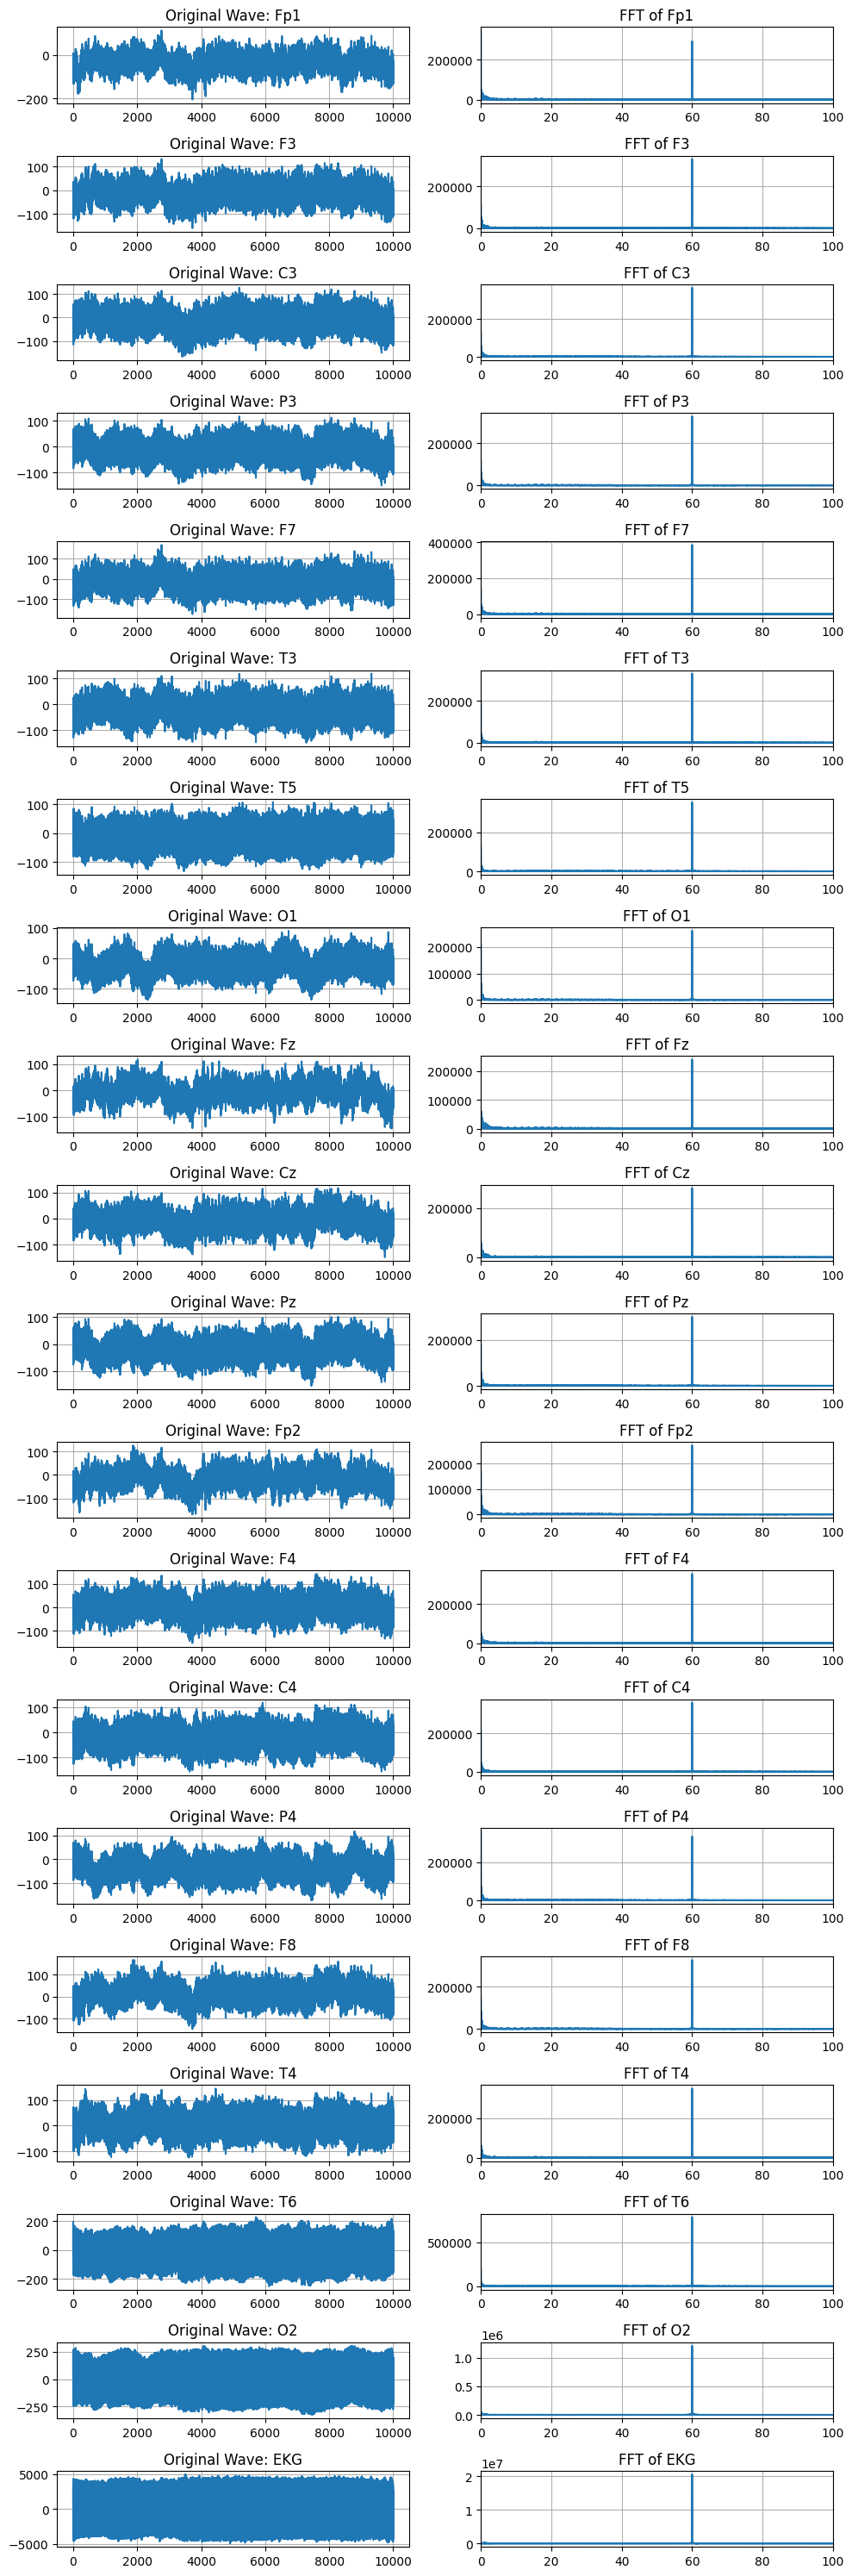

In [ ]:
fig, ax = plt.subplots(20, 2, figsize=(10, 30))

for i, column in enumerate(sample_train_eeg.columns):
    # Original Wave
    ax[i, 0].plot(sample_train_eeg.index, sample_train_eeg[column], label=column)
    ax[i, 0].grid(True)
    ax[i, 0].set_title(f"Original Wave: {column}")

    # Apply FFT
    wave_fft = np.fft.fft(sample_train_eeg[column])
    amp_fft = abs(wave_fft)*(1/len(wave_fft))
    fft_freq = np.fft.fftfreq(len(sample_train_eeg.index), 1/200)

    # Compute magnitudes
    fft_magnitude = np.abs(wave_fft)

    # Frequency Spectrum
    ax[i, 1].plot(fft_freq, fft_magnitude, label=column)
    ax[i, 1].grid(True)
    ax[i, 1].set_title(f"FFT of {column}")
    ax[i,1].set_xlim([0, 100]) #max(fft_freq)/2]) # Limit x-axis to half the maximum frequency for clarity
    #ax[i,1].set_ylim([0, 150000])

plt.tight_layout() # Adjusts subplot params so that subplots fit into the figure area
plt.show()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


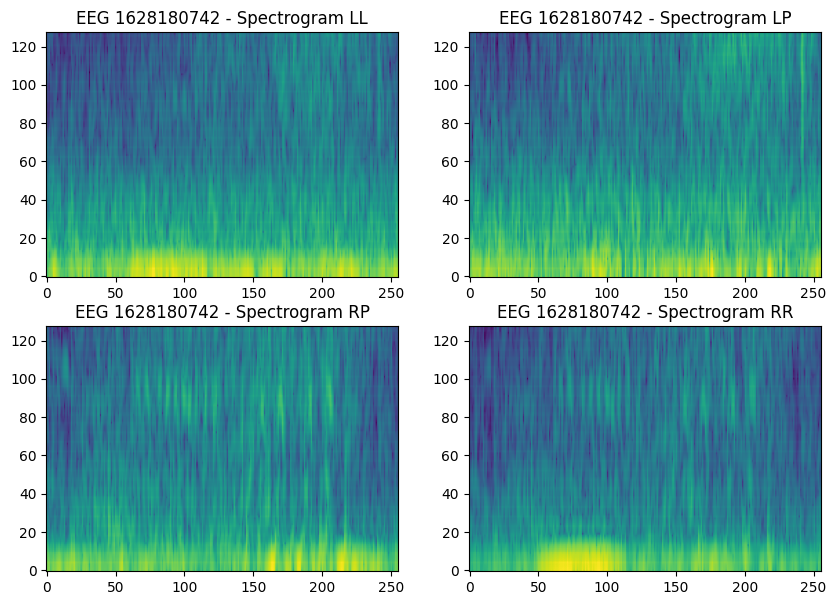

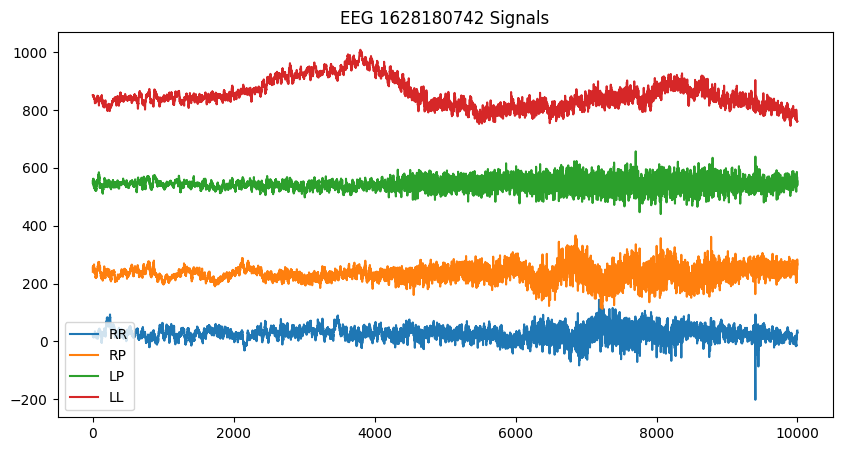


#########################



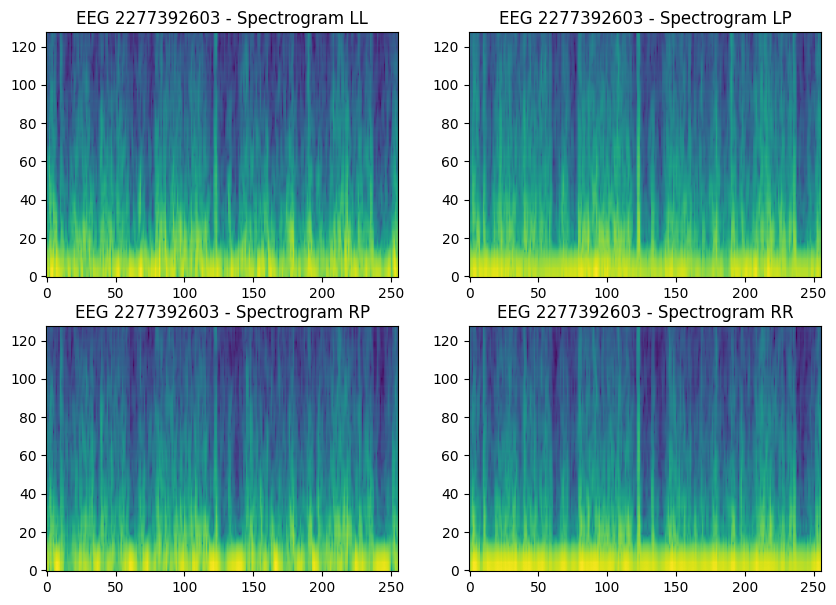

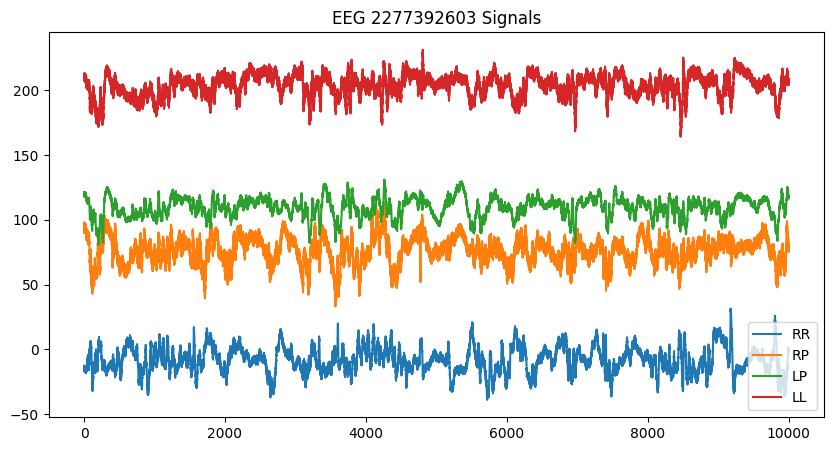


#########################



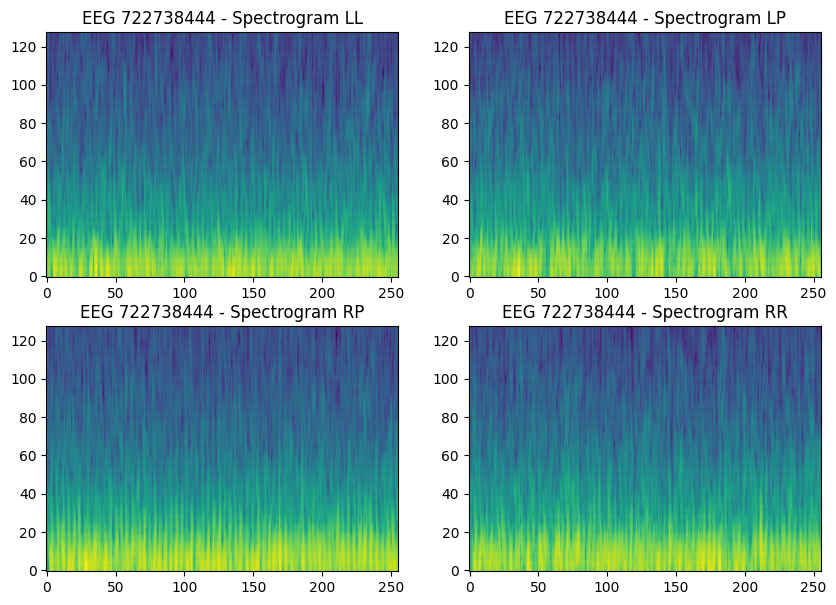

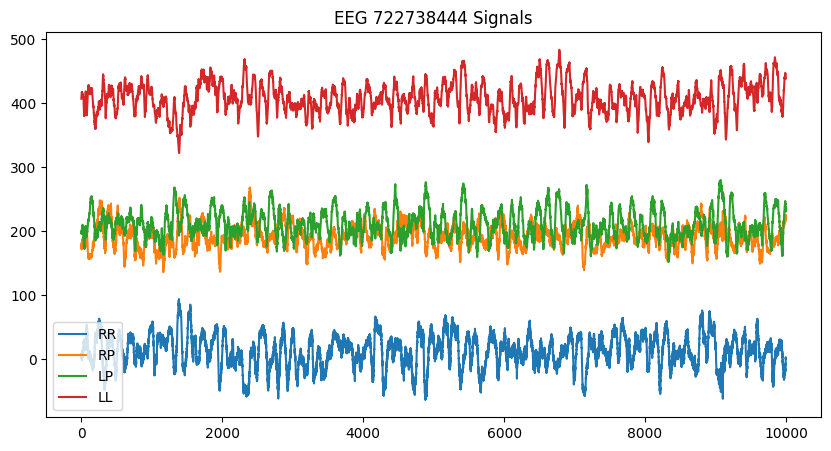


#########################



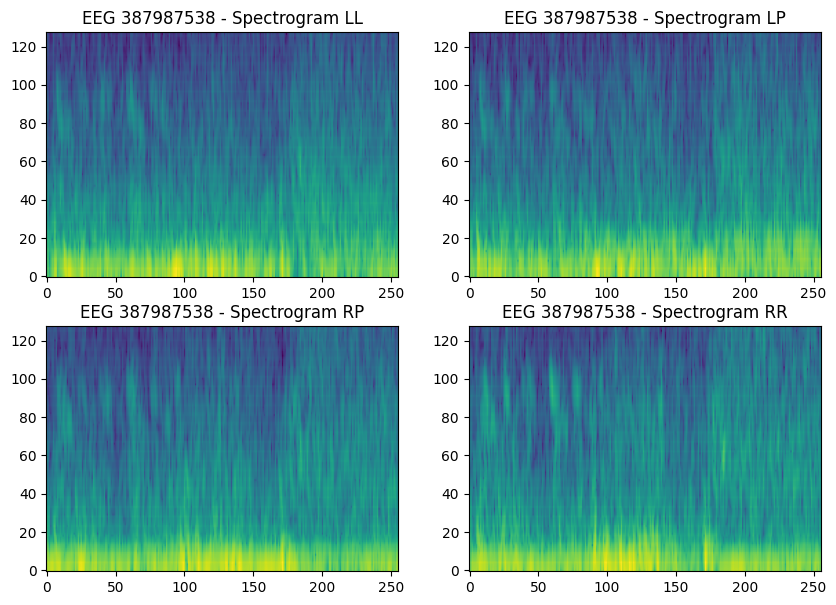

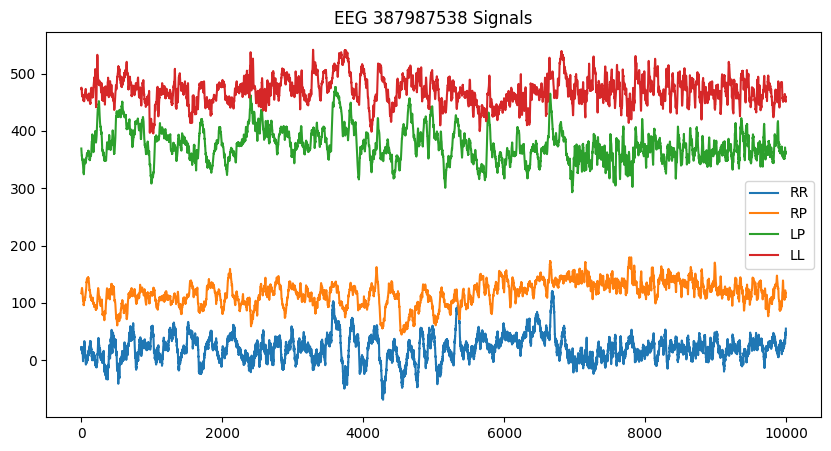


#########################

Creating and writing 17089 spectrograms to disk... 100 , 200 , 300 , 400 , 500 , 600 , 700 , 800 , 900 , 1000 , 1100 , 1200 , 1300 , 1400 , 1500 , 1600 , 1700 , 1800 , 1900 , 2000 , 2100 , 2200 , 2300 , 2400 , 2500 , 2600 , 2700 , 2800 , 2900 , 3000 , 3100 , 3200 , 3300 , 3400 , 3500 , 3600 , 3700 , 3800 , 3900 , 4000 , 4100 , 4200 , 4300 , 4400 , 4500 , 4600 , 4700 , 4800 , 4900 , 5000 , 5100 , 5200 , 5300 , 5400 , 5500 , 5600 , 5700 , 5800 , 5900 , 6000 , 6100 , 6200 , 6300 , 6400 , 6500 , 6600 , 6700 , 6800 , 6900 , 7000 , 7100 , 7200 , 7300 , 7400 , 7500 , 7600 , 7700 , 7800 , 7900 , 8000 , 8100 , 8200 , 8300 , 8400 , 8500 , 8600 , 8700 , 8800 , 8900 , 9000 , 9100 , 9200 , 9300 , 9400 , 9500 , 9600 , 9700 , 9800 , 9900 , 10000 , 10100 , 10200 , 10300 , 10400 , 10500 , 10600 , 10700 , 10800 , 10900 , 11000 , 11100 , 11200 , 11300 , 11400 , 11500 , 11600 , 11700 , 11800 , 11900 , 12000 , 12100 , 12200 , 12300 , 12400 , 12500 , 12600 , 12700 , 12800 , 12900

In [ ]:
import pywt
import librosa
import os
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt, gc

# DENOISE FUNCTION
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise(x, wavelet='haar', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    ret=pywt.waverec(coeff, wavelet, mode='per')

    return ret

def spectrogram_from_eeg(parquet_path, display=False):

    # LOAD MIDDLE 50 SECONDS OF EEG SERIES
    eeg = pd.read_parquet(parquet_path)
    middle = (len(eeg)-10_000)//2
    eeg = eeg.iloc[middle:middle+10_000]

    # VARIABLE TO HOLD SPECTROGRAM
    img = np.zeros((128,256,4),dtype='float32')

    if display: plt.figure(figsize=(10,7))
    signals = []
    for k in range(4):
        COLS = FEATS[k]

        for kk in range(4):

            # COMPUTE PAIR DIFFERENCES
            x = eeg[COLS[kk]].values - eeg[COLS[kk+1]].values

            # FILL NANS
            m = np.nanmean(x)
            if np.isnan(x).mean()<1: x = np.nan_to_num(x,nan=m)
            else: x[:] = 0

            # DENOISE
            if USE_WAVELET:
                x = denoise(x, wavelet=USE_WAVELET)
            signals.append(x)

            # RAW SPECTROGRAM
            mel_spec = librosa.feature.melspectrogram(y=x, sr=200, hop_length=len(x)//256,
                  n_fft=1024, n_mels=128, fmin=0, fmax=20, win_length=128)

            # LOG TRANSFORM
            width = (mel_spec.shape[1]//32)*32
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max).astype(np.float32)[:,:width]

            # STANDARDIZE TO -1 TO 1
            mel_spec_db = (mel_spec_db+40)/40
            img[:,:,k] += mel_spec_db

        # AVERAGE THE 4 MONTAGE DIFFERENCES
        img[:,:,k] /= 4.0

        if display:
            plt.subplot(2,2,k+1)
            plt.imshow(img[:,:,k],aspect='auto',origin='lower')
            plt.title(f'EEG {eeg_id} - Spectrogram {NAMES[k]}')

    if display:
        plt.show()
        plt.figure(figsize=(10,5))
        offset = 0
        for k in range(4):
            if k>0: offset -= signals[3-k].min()
            plt.plot(range(10_000),signals[k]+offset,label=NAMES[3-k])
            offset += signals[3-k].max()
        plt.legend()
        plt.title(f'EEG {eeg_id} Signals')
        plt.show()
        print(); print('#'*25); print()

    return img

train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/hms/train.csv')

NAMES = ['LL','LP','RP','RR']

FEATS = [['Fp1','F7','T3','T5','O1'],
         ['Fp1','F3','C3','P3','O1'],
         ['Fp2','F8','T4','T6','O2'],
         ['Fp2','F4','C4','P4','O2']]

directory_path = 'EEG_Spectrograms/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

USE_WAVELET = None #or "db8" or anything below

%time
PATH = '/content/drive/MyDrive/Colab_Notebooks/hms/train_eegs/'
DISPLAY = 4
EEG_IDS = train.eeg_id.unique()
all_eegs = {}

for i,eeg_id in enumerate(EEG_IDS):
    if (i%100==0)&(i!=0): print(i,', ',end='')

    # CREATE SPECTROGRAM FROM EEG PARQUET
    img = spectrogram_from_eeg(f'{PATH}{eeg_id}.parquet', i<DISPLAY)

    # SAVE TO DISK
    if i==DISPLAY:
        print(f'Creating and writing {len(EEG_IDS)} spectrograms to disk... ',end='')
    np.save(f'{directory_path}{eeg_id}',img)
    all_eegs[eeg_id] = img

# SAVE EEG SPECTROGRAM DICTIONARY
np.save('eeg_specs',all_eegs)

In [ ]:
sample_train_spectrogram = pd.read_parquet("/content/drive/MyDrive/Colab_Notebooks/hms/train_spectrograms/1000086677.parquet")
sample_train_spectrogram.head(30)

time    LL_0.59    LL_0.78    LL_0.98    LL_1.17    LL_1.37    LL_1.56  \
0      1  28.680000  53.990002  67.629997  59.880001  50.880001  74.309998   
1      3  29.639999  38.959999  44.009998  66.800003  48.509998  42.180000   
2      5   8.890000   9.020000  16.360001  23.559999  27.340000  30.040001   
3      7   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
4      9        NaN        NaN        NaN        NaN        NaN        NaN   
5     11        NaN        NaN        NaN        NaN        NaN        NaN   
6     13        NaN        NaN        NaN        NaN        NaN        NaN   
7     15        NaN        NaN        NaN        NaN        NaN        NaN   
8     17        NaN        NaN        NaN        NaN        NaN        NaN   
9     19        NaN        NaN        NaN        NaN        NaN        NaN   
10    21        NaN        NaN        NaN        NaN        NaN        NaN   
11    23        NaN        NaN        NaN        NaN        NaN        NaN   
12    25        NaN        NaN        NaN        NaN        NaN        NaN   
13    27        NaN        NaN        NaN        NaN        NaN        NaN   
14    29        NaN        NaN        NaN        NaN        NaN        NaN   
15    31        NaN        NaN        NaN        NaN        NaN        NaN   
16    33        NaN        NaN        NaN        NaN        NaN        NaN   
17    35        NaN        NaN        NaN        NaN        NaN        NaN   
18    37        NaN        NaN        NaN        NaN        NaN        NaN   
19    39        NaN        NaN        NaN        NaN        NaN        NaN   
20    41        NaN        NaN        NaN        NaN        NaN        NaN   
21    43        NaN        NaN        NaN        NaN        NaN        NaN   
22    45        NaN        NaN        NaN        NaN        NaN        NaN   
23    47        NaN        NaN        NaN        NaN        NaN        NaN   
24    49        NaN        NaN        NaN        NaN        NaN        NaN   
25    51        NaN        NaN        NaN        NaN        NaN        NaN   
26    53        NaN        NaN        NaN        NaN        NaN        NaN   
27    55        NaN        NaN        NaN        NaN        NaN        NaN   
28    57        NaN        NaN        NaN        NaN        NaN        NaN   
29    59        NaN        NaN        NaN        NaN        NaN        NaN   

      LL_1.76    LL_1.95    LL_2.15  ...  RP_18.16  RP_18.36  RP_18.55  \
0   78.480003  63.080002  59.869999  ...      0.13      0.14      0.08   
1   47.340000  48.599998  40.880001  ...      0.15      0.13      0.08   
2   27.559999  23.290001  15.120000  ...      0.12      0.11      0.08   
3    1.190000   1.110000   1.010000  ...      0.03      0.03      0.03   
4         NaN        NaN        NaN  ...       NaN       NaN       NaN   
5         NaN        NaN        NaN  ...       NaN       NaN       NaN   
6         NaN        NaN        NaN  ...       NaN       NaN       NaN   
7         NaN        NaN        NaN  ...       NaN       NaN       NaN   
8         NaN        NaN        NaN  ...       NaN       NaN       NaN   
9         NaN        NaN        NaN  ...       NaN       NaN       NaN   
10        NaN        NaN        NaN  ...       NaN       NaN       NaN   
11        NaN        NaN        NaN  ...       NaN       NaN       NaN   
12        NaN        NaN        NaN  ...       NaN       NaN       NaN   
13        NaN        NaN        NaN  ...       NaN       NaN       NaN   
14        NaN        NaN        NaN  ...       NaN       NaN       NaN   
15        NaN        NaN        NaN  ...       NaN       NaN       NaN   
16        NaN        NaN        NaN  ...       NaN       NaN       NaN   
17        NaN        NaN        NaN  ...       NaN       NaN       NaN   
18        NaN        NaN        NaN  ...       NaN       NaN       NaN   
19        NaN        NaN        NaN  ...       NaN       NaN       NaN   
20        NaN        NaN       

In [ ]:
def transform_optimized(data):
    # Forward fill NaNs where the next row is also NaN
    data_ffill = data.ffill()

    # Interpolate where the next row is not NaN
    # 'limit' and 'limit_direction' ensure we only fill NaNs that have non-NaN following them
    data_interpolated = data.interpolate(limit=1, limit_direction='forward')

    # Use forward fill where interpolation did not apply
    # This is where both current and next rows are NaN
    data_combined = data_interpolated.combine_first(data_ffill)

    return data_combined

transform_optimized(sample_train_spectrogram).head(30)

time    LL_0.59    LL_0.78    LL_0.98    LL_1.17    LL_1.37    LL_1.56  \
0      1  28.680000  53.990002  67.629997  59.880001  50.880001  74.309998   
1      3  29.639999  38.959999  44.009998  66.800003  48.509998  42.180000   
2      5   8.890000   9.020000  16.360001  23.559999  27.340000  30.040001   
3      7   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
4      9   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
5     11   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
6     13   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
7     15   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
8     17   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
9     19   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
10    21   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
11    23   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
12    25   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
13    27   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
14    29   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
15    31   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
16    33   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
17    35   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
18    37   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
19    39   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
20    41   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
21    43   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
22    45   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
23    47   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
24    49   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
25    51   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
26    53   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
27    55   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
28    57   1.770000   1.930000   1.810000   1.600000   1.430000   1.280000   
29    59   0.890000   0.965000   0.905000   0.800000   0.715000   0.640000   

      LL_1.76    LL_1.95    LL_2.15  ...  RP_18.16  RP_18.36  RP_18.55  \
0   78.480003  63.080002  59.869999  ...     0.130     0.140     0.080   
1   47.340000  48.599998  40.880001  ...     0.150     0.130     0.080   
2   27.559999  23.290001  15.120000  ...     0.120     0.110     0.080   
3    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
4    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
5    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
6    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
7    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
8    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
9    1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
10   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
11   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
12   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
13   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
14   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
15   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
16   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
17   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
18   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
19   1.190000   1.110000   1.010000  ...     0.030     0.030     0.030   
20   1.190000   1.110000   1.01

<ipython-input-24-72c792b5c8bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i] = data.iloc[i-1]
<ipython-input-24-72c792b5c8bc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[i] = data.interpolate().iloc[i]
<ipython-input-24-72c792b5c8bc>:19: RuntimeWarning: invalid value encountered in log
  log_transformed = np.where(data > 0, np.log(data), -np.log(-data))
<ipython-input-24-72c792b5c8bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True  True  True ... False  True False]
 [ True False False ...  True  True  True]
 [False False False ...  True  True  True]]
(300, 100)
[[ 3.35619998  3.38912487  2.18492699 ... -1.46967602  0.74668789
   0.84156716]
 [ 3.98879886  3.66253543  2.19944429 ... -1.83258152  1.18479002
   1.25561607]
 [ 4.21405172  3.78441691  2.79483938 ... -1.6607312   1.47017586
   1.46325541]
 ...
 [-2.81341076 -2.5257287  -2.99573231 ...  0.         -4.60517025
  -4.60517025]
 [-2.81341076 -2.65926003 -3.21887589 ...  0.         -4.60517025
  -4.60517025]
 [-2.99573231 -2.81341076 -3.50655794 ...  0.         -4.60517025
  -4.60517025]]
(100, 1200)


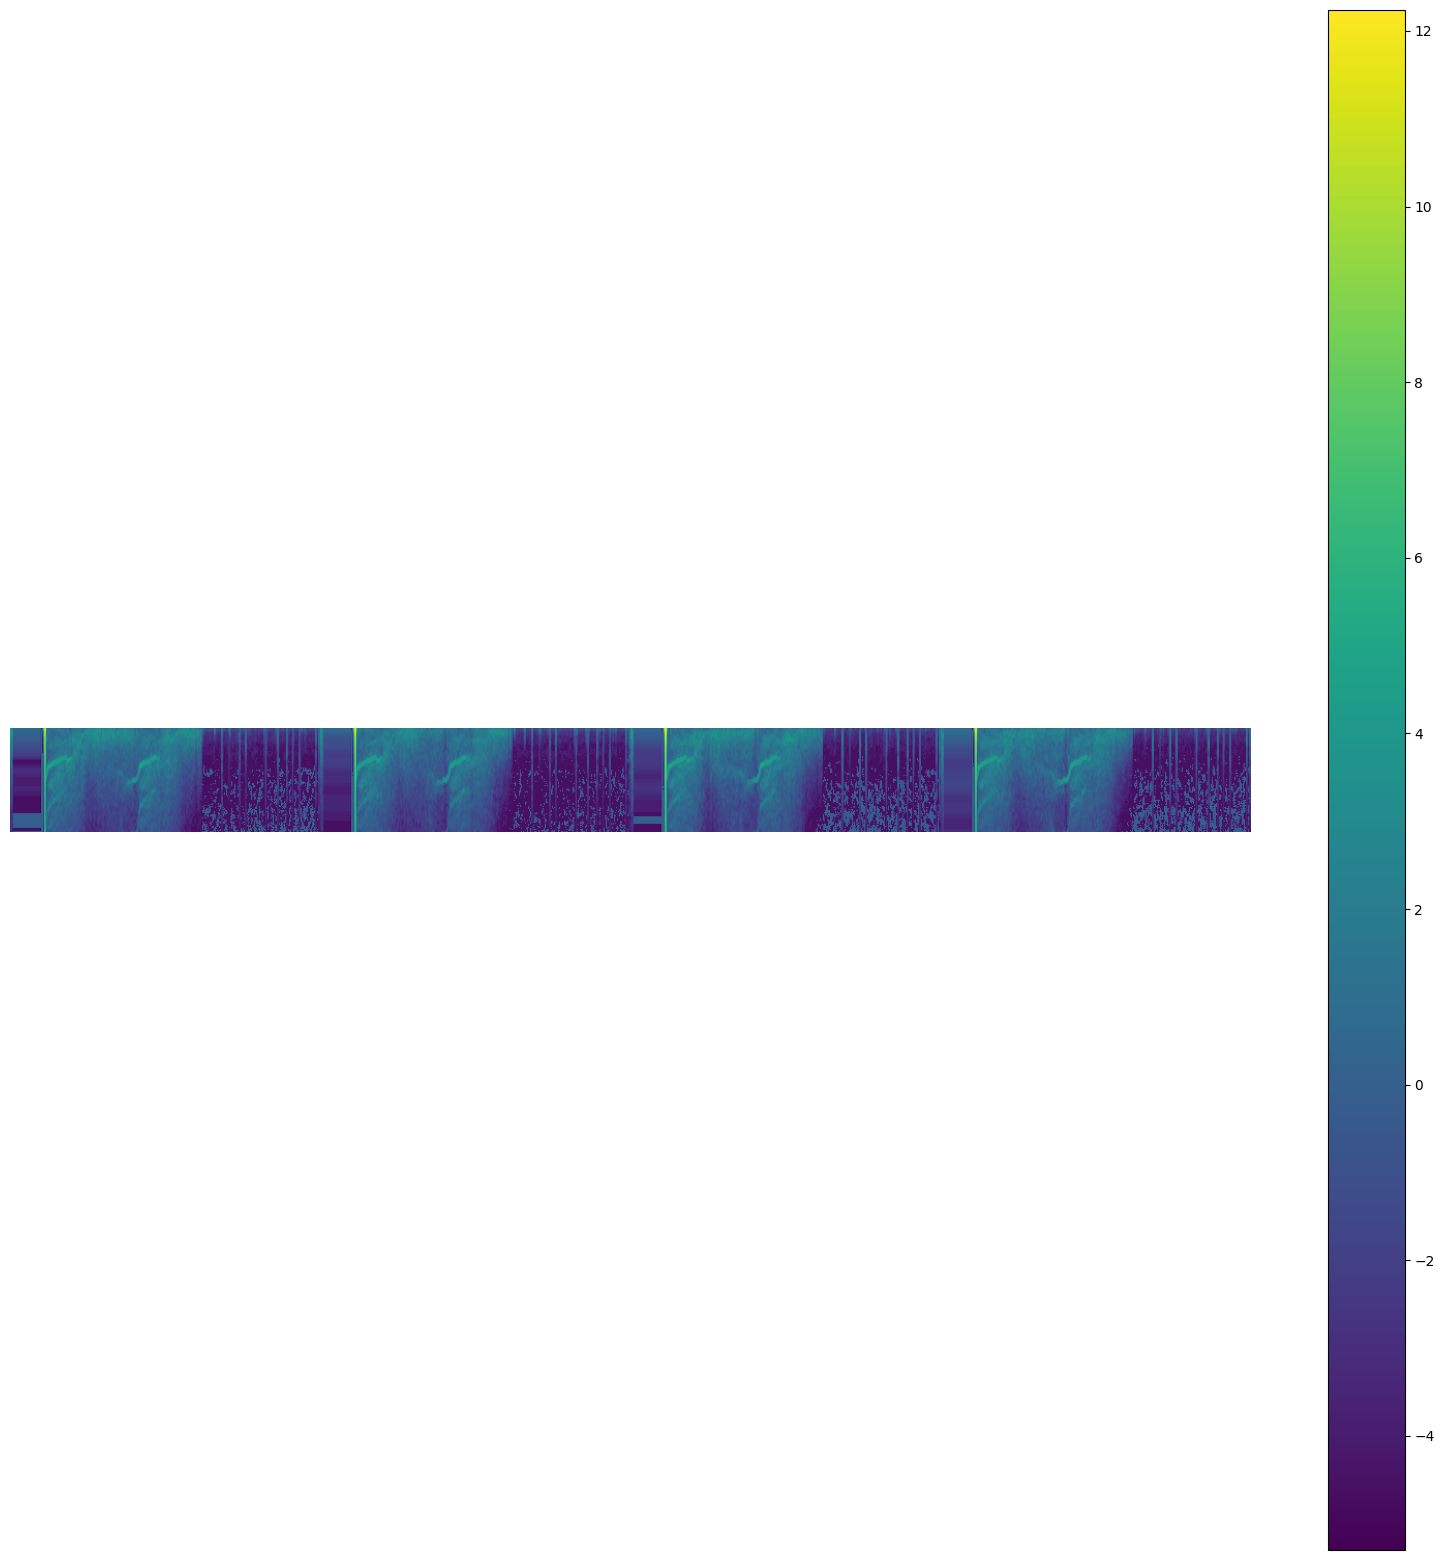

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def custom_log_transform(data):
    # Check the first column for NaN values and handle accordingly
    for i in range(1, len(data)):
        # If the current row is NaN and the next row is also NaN, use the previous value
        if pd.isna(data.iloc[i, 0]) and pd.isna(data.iloc[min(i+1, len(data)-1), 0]):
            data.iloc[i] = data.iloc[i-1]
        # If the current row is NaN and the next row is not NaN, interpolate
        elif pd.isna(data.iloc[i, 0]) and not pd.isna(data.iloc[min(i+1, len(data)-1), 0]):
            data.iloc[i] = data.interpolate().iloc[i]

    # Replace 0s with 1 (to avoid log(0))
    data = data.replace(0, 1).values

    # Apply log transformation, handling negative values separately
    log_transformed = np.where(data > 0, np.log(data), -np.log(-data))

    return log_transformed

# Loading the spectrogram data
sample_spect = pd.read_parquet("/content/drive/MyDrive/Colab_Notebooks/hms/train_spectrograms/1000086677.parquet")

# Extracting individual spectrogram matrices
LL = custom_log_transform(sample_spect.filter(regex='^LL', axis=1))
RL = custom_log_transform(sample_spect.filter(regex='^RL', axis=1))
LP = custom_log_transform(sample_spect.filter(regex='^LP', axis=1))
RP = custom_log_transform(sample_spect.filter(regex='^RP', axis=1))

print(LL<0)
print(LL.shape)

# Assuming each matrix has the same dimensions
rows, cols = LL.shape

# Creating a larger matrix to hold all four spectrograms
combined_matrix = np.zeros((cols, rows * 4))

# Placing each spectrogram matrix in the correct position
combined_matrix[0:cols, 0:rows] = LL.T  # LL at position (0,0)
combined_matrix[0:cols, rows:rows*2] = RL.T  # RL at position (1,0)
combined_matrix[0:cols, rows*2:rows*3] = LP.T  # LP at position (0,1)
combined_matrix[0:cols, rows*3:rows*4] = RP.T  # RP at position (1,1)

print(combined_matrix)
print(combined_matrix.shape)

plt.figure(figsize=(20, 20))
plt.imshow(combined_matrix, cmap='viridis')  # You can choose a different colormap if you like
plt.colorbar()  # Adds a colorbar to indicate the scale

plt.axis('off')  # Hides the axis
plt.savefig('matrix_image.png', bbox_inches='tight', pad_inches=0)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


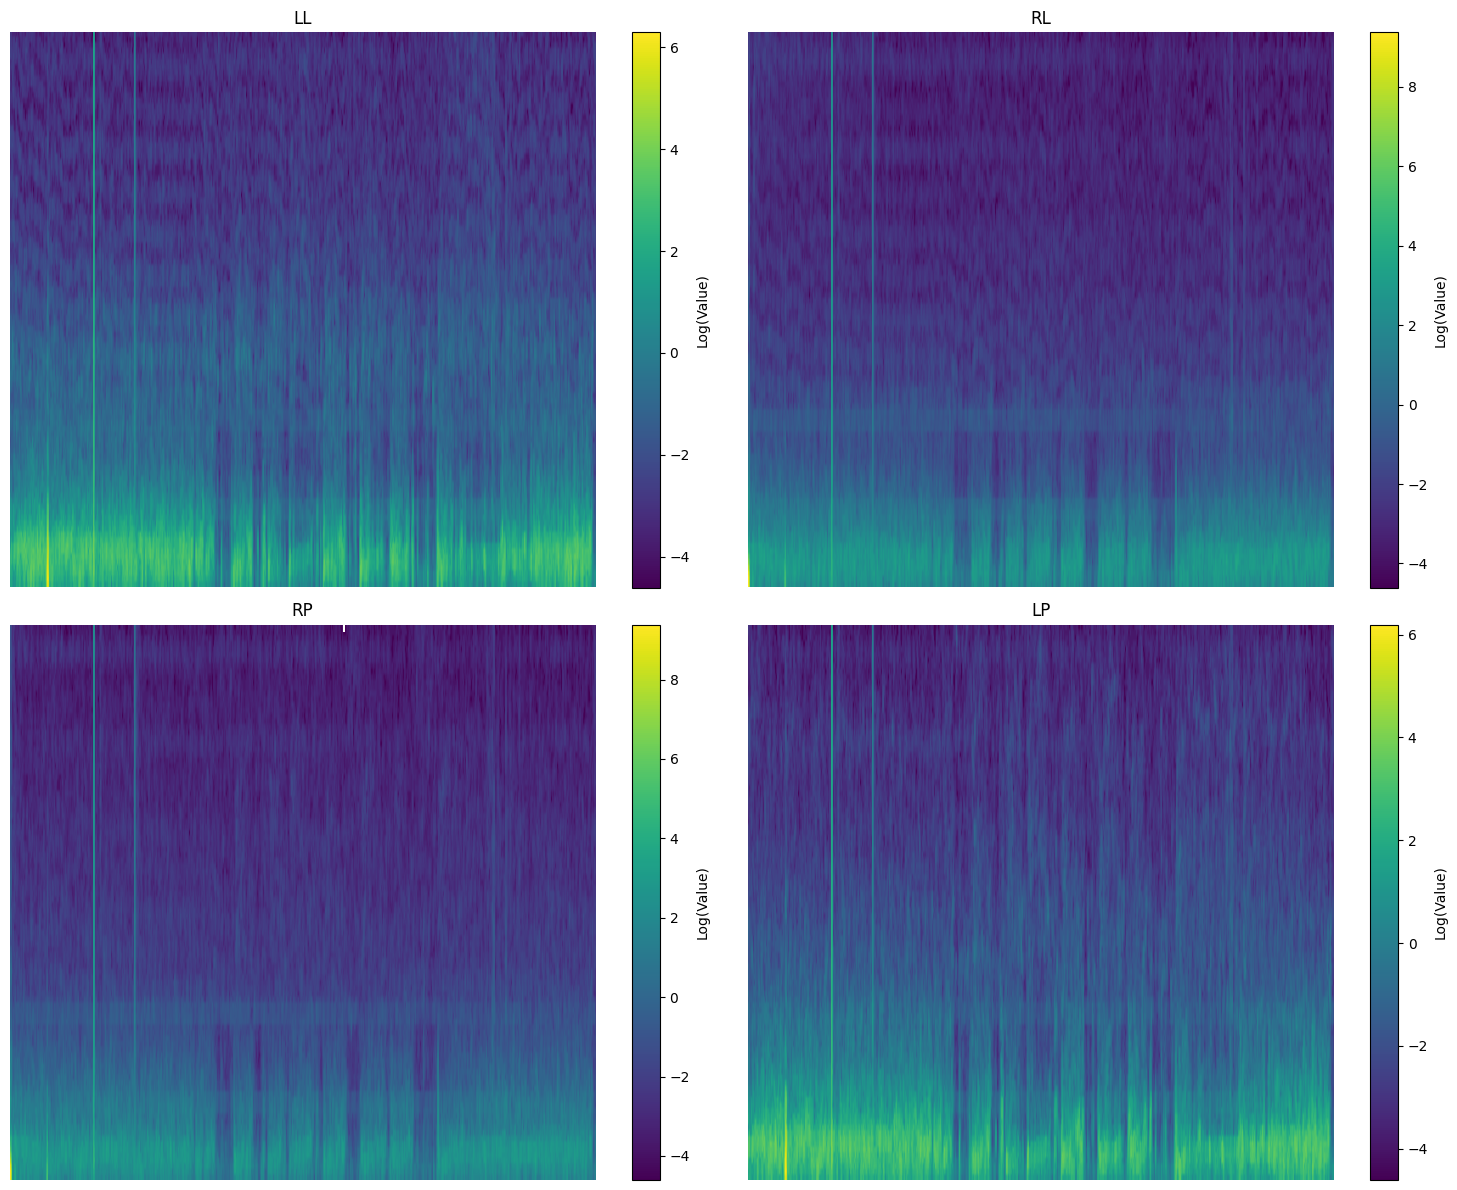

In [ ]:
def plot_spectrogram(spectrogram_path):
    sample_spect = pd.read_parquet(spectrogram_path)

    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])

        ax.axis('off')
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        plt.savefig(f'{spectrogram_path[-18:-8]}_{split_name}', bbox_inches=extent, pad_inches=0)
    plt.tight_layout()
    plt.show()

plot_spectrogram("/content/drive/MyDrive/Colab_Notebooks/hms/train_spectrograms/1000189855.parquet")

In [ ]:
# Import necessary modules
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import numpy as np
from tqdm import tqdm

# Define a function for loading and transforming image data
def load_classification_data(data_dir='data/classification/train'):
    # Define transformations: random crop, random flip, convert to tensor, and normalize
    transform = transforms.Compose([
        transforms.RandomResizedCrop(224),  # Resize and crop the image to a 224x224 square
        transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image with mean and standard deviation
    ])

    # Load the dataset from directory and apply transformations
    full_dataset = datasets.ImageFolder(data_dir, transform)

    # Split the full dataset into train and validation sets
    train_size = int(0.8 * len(full_dataset))  # 80% of the dataset is used for training
    val_size = len(full_dataset) - train_size  # The rest is used for validation

    # Randomly split dataset into training and validation dataset
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

    # Create data loaders for train and validation sets
    # They provide an easy way to iterate over the dataset in mini-batches
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Shuffle the training data
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)  # No need to shuffle validation data

    return {'train': train_loader, 'val': val_loader}, len(full_dataset.classes)  # Return loaders and number of classes in the dataset



# Define a function to train the model
def train_classification_model(model, dataloaders, criterion, optimizer, scheduler, device, n_epochs_stop=6):
    # Initialize variables
    min_val_loss = np.Inf  # Minimum validation loss starts at infinity
    epochs_no_improve = 0  # No improvement in epochs counter

    # Loop over epochs
    for epoch in range(100):
        print('Epoch {}/{}'.format(epoch, 100 - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            # Initialize metrics for this phase
            running_loss = 0.0  # Accumulate losses over the epoch
            correct = 0  # Count correct predictions
            total = 0  # Count total predictions

            # Use tqdm for progress bar
            with tqdm(total=len(dataloaders[phase]), unit='batch') as p:
                # Iterate over mini-batches
                for inputs, labels in dataloaders[phase]:
                    # Move input and label tensors to the default device (GPU or CPU)
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # Clear the gradients of all optimized variables
                    optimizer.zero_grad()

                    # Forward pass: compute predicted outputs by passing inputs to the model
                    with torch.set_grad_enabled(phase == 'train'):  # Only calculate gradients in training phase
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)  # Get the class with the highest probability
                        loss = criterion(outputs, labels)  # Compute the loss

                        # Perform backward pass and optimization only in the training phase
                        if phase == 'train':
                            loss.backward()  # Calculate gradients based on the loss
                            optimizer.step()  # Update model parameters based on the current gradient

                    # Update running loss and correct prediction count
                    running_loss += loss.item() * inputs.size(0)  # Multiply average loss by batch size
                    total += labels.size(0)
                    correct += (preds == labels).sum().item()  # Update correct predictions count

                    # Update the progress bar
                    p.set_postfix({'loss': loss.item(), 'accuracy': 100 * correct / total})
                    p.update(1)

                # Calculate loss and accuracy for this epoch
                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                epoch_acc = 100 * correct / total

                print('{} Loss: {:.4f} Acc: {:.2f}%'.format(phase, epoch_loss, epoch_acc))

                # Save model and implement early stopping in validation phase
                if phase == 'val':
                    if epoch_loss < min_val_loss:
                        print(f'Validation Loss Decreased({min_val_loss:.6f}--->{epoch_loss:.6f}) \t Saving The Model')
                        min_val_loss = epoch_loss  # Update minimum validation loss
                        torch.save(model.state_dict(), 'weights/classification_model.pt')  # Save the current model weights
                        epochs_no_improve = 0  # Reset epochs since last improvement
                    else:
                        epochs_no_improve += 1
                        # Implement early stopping
                        if epochs_no_improve == n_epochs_stop:
                            print('Early stopping!')
                            model.load_state_dict(torch.load('weights/classification_model.pt'))  # Load the best model weights
                            model.eval()
                            return model  # Exit the function early

            # Adjust the learning rate based on the scheduler
            scheduler.step(epoch_loss)

    # Return the trained model
    return model

In [ ]:
# Import necessary modules and functions
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

class Classifier(nn.Module):
    def __init__(self, num_classes, backbone = 'dinov2_s', head = 'linear', backbones = dino_backbones):
        super(Classifier, self).__init__()
        self.heads = {
            'linear':linear_head
        }
        self.backbones = dino_backbones
        self.backbone = load('facebookresearch/dinov2', self.backbones[backbone]['name'])
        self.backbone.eval()
        self.head = self.heads[head](self.backbones[backbone]['embedding_size'],num_classes)

    def forward(self, x):
        with torch.no_grad():
            x = self.backbone(x)
        x = self.head(x)
        return x

# Check if CUDA is available and set PyTorch to use GPU or CPU accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Use the load_data function from tools.training to load our dataset
# This function presumably returns a set of data loaders and the number of classes in the dataset
dataloaders, num_classes = load_classification_data()

# Initialize our classifier model with the number of output classes equal to num_classes

model = Classifier(num_classes) # this will load the small model
# model = Classifier(num_classes, backbone = 'dinov2_b') # to load the base model
# model = Classifier(num_classes, backbone = 'dinov2_l') # to load the large model
# model = Classifier(num_classes, backbone = 'dinov2_g') # to load the largest model


# Move the model to the device (GPU or CPU)
model.to(device)

# Set our loss function to Cross Entropy Loss, a common choice for classification problems
criterion = nn.CrossEntropyLoss()

# Initialize Stochastic Gradient Descent (SGD) as our optimizer
# Set the initial learning rate to 0.001 and momentum to 0.9
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Initialize a learning rate scheduler that reduces learning rate when a metric has stopped improving
# In this case, we're monitoring the minimum validation loss with a patience of 7 epochs
# i.e., the learning rate will be reduced if the validation loss does not improve for 7 consecutive epochs
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=7, verbose=True)

# Finally, use the train_model function from tools.training to train our model
# The model, dataloaders, loss function, optimizer, learning rate scheduler, and device are passed as arguments
model = train_classification_model(model, dataloaders, criterion, optimizer, scheduler, device)

In [ ]:
import torch
from torchvision import transforms
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np
from IPython.display import display, HTML

import warnings
warnings.filterwarnings("ignore")

# Path to the test image
test_image = "examples/test.jpg"

# Path to the saved model weights
model_weights = "weights/classification_model.pt"

# List of class labels
classes = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

# Number of classes
num_classes = len(classes)

# Device selection (CUDA GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create an instance of the classifier model
model = Classifier(num_classes)

# Load the pretrained weights into the model
model.load_state_dict(torch.load(model_weights))

# Set the model to evaluation mode (disable gradient computation)
model.eval()

# Move the model to the specified device (e.g., GPU)
model.to(device)

print("Model loaded successfully...")

In [ ]:
# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize the image to 224x224 pixels
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize the image tensor
])

# Function to preprocess an image
def preprocess(img_path):
    img = Image.open(img_path)  # Open the image file
    img = transform(img)  # Apply the defined transformation pipeline to the image
    img = img[None, :]  # Add a batch dimension to the image tensor
    return img  # Return the preprocessed image tensor

# Preprocess the test image
img = preprocess(test_image)

# Move the image to the device (e.g., GPU) for computation
img = img.to(device)

# Pass the preprocessed image through the model to get the result
with torch.no_grad():
    result = model(img)

# Detach the result from the computation graph to avoid backpropagation
result = result.detach()

# Move the result to the CPU for further processing
result = result.cpu()

# Convert the result to a numpy array for easier manipulation
result = result.numpy()

# Find the index of the maximum value in the result array
result = np.argmax(result)

# Map the index to the corresponding class label
result = classes[result]

In [ ]:
# Display the result using an HTML heading tag
display(HTML(f"<h1>{result}</h1>"))

# Open and display the original image
Image.open(test_image)